# LOAD LIBRARIES AND DATA

In [1]:
#load necessary libraries

library(dplyr)
library(psych)
library(lme4)
library(lmerTest)
library(tidyverse)
library(multcomp)
library(EMAtools)
library(effsize)
library(leaps)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Loading required package: Matrix

Attaching package: ‘lmerTest’

The following object is masked from ‘package:lme4’:

    lmer

The following object is masked from ‘package:stats’:

    step

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.1     ✔ readr   1.3.1
✔ tibble  2.1.1     ✔ purrr   0.3.2
✔ tidyr   0.8.3     ✔ stringr 1.4.0
✔ ggplot2 3.1.1     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ ggplot2::%+%()   masks psych::%+%()
✖ ggplot2::alpha() masks psych::alpha()
✖ tidyr::expand()  masks Matrix::expand()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()
Loading required package: mvtnorm
Loading required package: survival
Loading required package: TH.data
Lo

In [2]:
#load data and designate categorical variables as factors

peakPupil = read.csv(file="/Users/Michael/Documents/CMU/Research/ASD/nback/tidyData_IRF4_SANITY.csv")
peakPupil$subjectNumber = factor(peakPupil$subjectNumber)
peakPupil$diagnosis = factor(peakPupil$diagnosis)
peakPupil$female = factor(peakPupil$female)
peakPupil$caffeine = factor(peakPupil$caffeine)
peakPupil$meds = factor(peakPupil$meds)
peakPupil$glasses = factor(peakPupil$glasses)
peakPupil$hit = factor(peakPupil$hit)
peakPupil$FA = factor(peakPupil$FA)
peakPupil$miss = factor(peakPupil$miss)
peakPupil$aud = factor(peakPupil$aud)
peakPupil$distractors = factor(peakPupil$distractors)
peakPupil$ADOS = peakPupil$ADOSComm + peakPupil$ADOSSoc + peakPupil$ADOSBeh

In [3]:
#create subset of data with ASD participants only

dataAut = peakPupil %>%
subset(diagnosis == 1)

# COMPARISON OF GROUPS FOR METHODS

In [4]:
#create subset of data such that measures for each participant are observed only once

dataMeth = peakPupil %>%
subset(hit == 1 & FA == 0 & miss == 0 & aud == 0 & distractors == 0)

In [5]:
#get summary statistics of participant info.

describeBy(dataMeth, group = dataMeth$diagnosis)

Warning message in FUN(newX[, i], ...):
“no non-missing arguments to min; returning Inf”Warning message in FUN(newX[, i], ...):
“no non-missing arguments to min; returning Inf”Warning message in FUN(newX[, i], ...):
“no non-missing arguments to min; returning Inf”Warning message in FUN(newX[, i], ...):
“no non-missing arguments to min; returning Inf”Warning message in FUN(newX[, i], ...):
“no non-missing arguments to min; returning Inf”Warning message in FUN(newX[, i], ...):
“no non-missing arguments to min; returning Inf”Warning message in FUN(newX[, i], ...):
“no non-missing arguments to min; returning Inf”Warning message in FUN(newX[, i], ...):
“no non-missing arguments to min; returning Inf”Warning message in FUN(newX[, i], ...):
“no non-missing arguments to max; returning -Inf”Warning message in FUN(newX[, i], ...):
“no non-missing arguments to max; returning -Inf”Warning message in FUN(newX[, i], ...):
“no non-missing arguments to max; returning -Inf”Warning message in FUN(newX[,


 Descriptive statistics by group 
group: 0
               vars  n   mean    sd median trimmed   mad    min    max  range
subjectNumber*    1 24  25.62 13.72  24.50   25.40 17.05   6.00  47.00  41.00
diagnosis*        2 24   1.00  0.00   1.00    1.00  0.00   1.00   1.00   0.00
age               3 24  28.38  6.74  25.50   27.45  5.19  21.00  47.00  26.00
female*           4 24   1.08  0.28   1.00    1.00  0.00   1.00   2.00   1.00
handedness        5 24  59.16 45.41  70.00   66.78 36.19 -85.71 100.00 185.71
caffeine*         6 24   1.54  0.51   2.00    1.55  0.00   1.00   2.00   1.00
meds*             7 24   1.04  0.20   1.00    1.00  0.00   1.00   2.00   1.00
glasses*          8 24   1.42  0.50   1.00    1.40  0.00   1.00   2.00   1.00
pupilContrast     9 24  77.29  9.09  80.00   77.25  7.41  55.00 100.00  45.00
corneaContrast   10 24 250.00  0.00 250.00  250.00  0.00 250.00 250.00   0.00
ADOSComm         11  0    NaN    NA     NA     NaN    NA    Inf   -Inf   -Inf
ADOSSoc          12 

In [6]:
#run logistic regression on general participant info.

glm.fit = glm(diagnosis ~ age + female + handedness, data = dataMeth, family = binomial)
summary(glm.fit)
# cohen.d(dataMeth$age,dataMeth$diagnosis,pooled=TRUE,paired=FALSE,na.rm=TRUE)
# cohen.d(dataMeth$female,dataMeth$diagnosis,pooled=TRUE,paired=FALSE,na.rm=TRUE)
# cohen.d(dataMeth$handedness,dataMeth$diagnosis,pooled=TRUE,paired=FALSE,na.rm=TRUE)


Call:
glm(formula = diagnosis ~ age + female + handedness, family = binomial, 
    data = dataMeth)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.6696  -1.0442  -0.9054   1.2098   1.4855  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)
(Intercept) -2.172206   1.365181  -1.591    0.112
age          0.068647   0.042135   1.629    0.103
female1      0.051023   1.066384   0.048    0.962
handedness   0.001010   0.006483   0.156    0.876

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 65.135  on 46  degrees of freedom
Residual deviance: 62.236  on 43  degrees of freedom
AIC: 70.236

Number of Fisher Scoring iterations: 4


In [7]:
#run logistic regression on variables that could affect pupil size

glm.fit = glm(diagnosis ~ caffeine + glasses + meds, data = dataMeth, family = binomial)
summary(glm.fit)


Call:
glm(formula = diagnosis ~ caffeine + glasses + meds, family = binomial, 
    data = dataMeth)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.1294  -0.8264  -0.6275   0.4677   1.8558  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept)  -0.4548     0.5794  -0.785  0.43246   
caffeine1    -1.0703     0.7801  -1.372  0.17007   
glasses1      0.1168     0.7357   0.159  0.87392   
meds1         3.6828     1.1675   3.155  0.00161 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 65.135  on 46  degrees of freedom
Residual deviance: 45.600  on 43  degrees of freedom
AIC: 53.6

Number of Fisher Scoring iterations: 5


In [8]:
#run logistic rregression on eye-tracker settings

glm.fit = glm(diagnosis ~ pupilContrast + corneaContrast, data = dataMeth, family = binomial)
summary(glm.fit)


Call:
glm(formula = diagnosis ~ pupilContrast + corneaContrast, family = binomial, 
    data = dataMeth)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.6424  -1.1389  -0.6301   1.2164   1.4679  

Coefficients:
                 Estimate Std. Error z value Pr(>|z|)
(Intercept)    -8.375e+02  8.484e+04  -0.010    0.992
pupilContrast   5.698e-02  3.868e-02   1.473    0.141
corneaContrast  3.331e+00  3.393e+02   0.010    0.992

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 65.135  on 46  degrees of freedom
Residual deviance: 59.673  on 44  degrees of freedom
AIC: 65.673

Number of Fisher Scoring iterations: 15


# BEHAVIOURAL DATA ANALYSIS

In [9]:
#get subset of data such that behavioural measures per participant are observed only once per condition

dataBeh = peakPupil %>%
subset(hit == 1 & FA == 0 & miss == 0 & aud == 0)

dataAutBeh = dataAut %>%
subset(hit == 1 & FA == 0 & miss == 0 & aud == 0)

## d'

In [10]:
#see effect of group and condition

con.fit = lmer(dprime ~ diagnosis*distractors + (1 | subjectNumber), data = dataBeh)
summary(con.fit)
lme.dscore(con.fit,dataBeh,"lme4")

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: dprime ~ diagnosis * distractors + (1 | subjectNumber)
   Data: dataBeh

REML criterion at convergence: 193.4

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-2.14796 -0.37964  0.01247  0.41270  2.25185 

Random effects:
 Groups        Name        Variance Std.Dev.
 subjectNumber (Intercept) 0.5303   0.7282  
 Residual                  0.1617   0.4021  
Number of obs: 93, groups:  subjectNumber, 47

Fixed effects:
                        Estimate Std. Error       df t value Pr(>|t|)    
(Intercept)              3.54566    0.16980 55.59260  20.881   <2e-16 ***
diagnosis1              -0.38152    0.24273 55.59260  -1.572    0.122    
distractors1             0.07513    0.11608 43.10286   0.647    0.521    
diagnosis1:distractors1 -0.01764    0.16764 43.31027  -0.105    0.917    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
 

,t,df,d
diagnosis1,-1.5717749,55.59260,-0.42161090
distractors1,0.6472398,43.10286,0.19717061
diagnosis1:distractors1,-0.1052560,43.31027,-0.03198758


In [11]:
#compute Bayes factor for effect of group and condition

con.fit = lmer(dprime ~ diagnosis*distractors + (1 | subjectNumber), data = dataBeh)
no.fit = lmer(dprime ~ (1 | subjectNumber), data = dataBeh)
exp((BIC(con.fit)-BIC(no.fit))/2)

[1] 3057.153

In [12]:
#check to see if meds affect results

con.fit = lmer(dprime ~ meds*distractors + (1 | subjectNumber), data = dataAutBeh)
summary(con.fit)
lme.dscore(con.fit,dataAutBeh,"lme4")

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: dprime ~ meds * distractors + (1 | subjectNumber)
   Data: dataAutBeh

REML criterion at convergence: 105.4

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-2.06500 -0.39536 -0.05979  0.35795  2.11253 

Random effects:
 Groups        Name        Variance Std.Dev.
 subjectNumber (Intercept) 0.7616   0.8727  
 Residual                  0.2063   0.4542  
Number of obs: 45, groups:  subjectNumber, 23

Fixed effects:
                   Estimate Std. Error      df t value Pr(>|t|)    
(Intercept)          2.9932     0.3111 25.0477   9.621 6.82e-10 ***
meds1                0.3024     0.4138 25.0477   0.731    0.472    
distractors1         0.2102     0.2031 19.3159   1.035    0.314    
meds1:distractors1  -0.2808     0.2745 19.4503  -1.023    0.319    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
            (Intr) meds1  dstrc1


,t,df,d
meds1,0.7307211,25.04770,0.2920100
distractors1,1.0347903,19.31587,0.4708962
meds1:distractors1,-1.0229672,19.45034,-0.4639040


In [13]:
#compute Bayes factor for effect of meds

con.fit = lmer(dprime ~ meds*distractors + (1 | subjectNumber), data = dataAutBeh)
no.fit = lmer(dprime ~ (1 | subjectNumber), data = dataAutBeh)
exp((BIC(con.fit)-BIC(no.fit))/2)

[1] 659.9413

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.


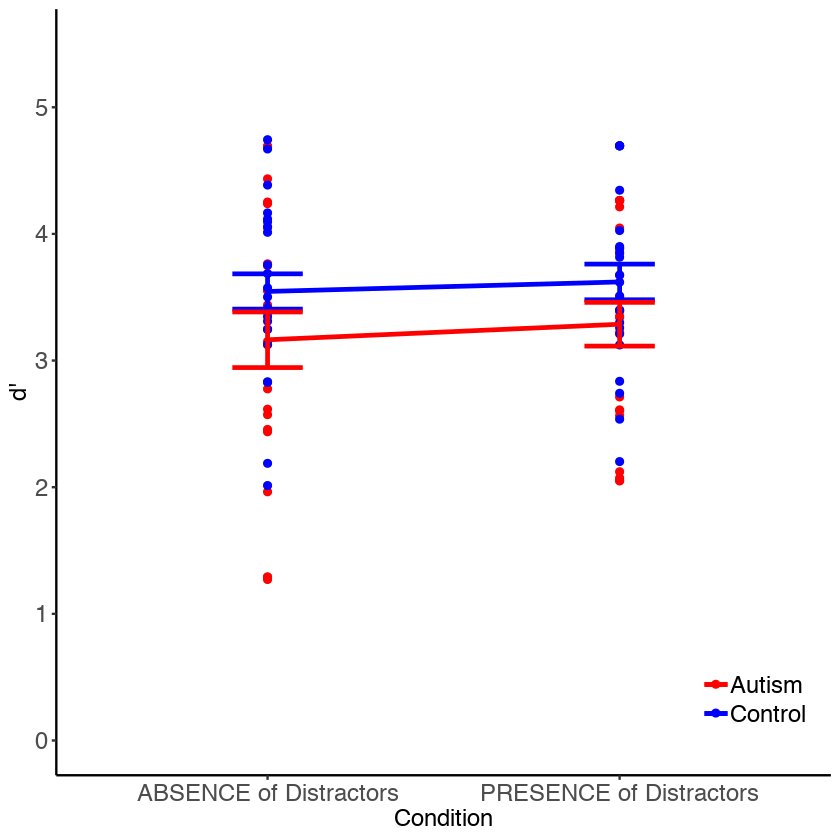

In [14]:
#plot data

ggplot(data = dataBeh) +
geom_point(mapping = aes(x = distractors, y = dprime)) +
aes(x = distractors, color = diagnosis, group = diagnosis, y = dprime) + 
stat_summary(fun.y = mean, geom = "line", size = 1) + 
stat_summary(fun.data = mean_se, geom = "errorbar", width = 0.2, size = 1) + 
scale_x_discrete(breaks = c("0","1"), labels = c("ABSENCE of Distractors","PRESENCE of Distractors")) +
scale_color_discrete(breaks = c("1","0"), labels = c("Autism","Control")) +
scale_color_manual(breaks = c("1","0"), labels = c("Autism", "Control"), values=c("blue", "red")) +
scale_y_continuous(breaks = 0:5,limits = c(0,5.5)) +
ylab("d'") +
xlab("Condition") +
theme_classic() +
theme(legend.position=c(0.9,0.1)) +
theme(legend.title=element_blank()) +
theme(axis.text=element_text(size=14)) +
theme(axis.title=element_text(size=14)) +
theme(legend.text=element_text(size=14))

## CRITERION

In [15]:
#see effect of group and condition

con.fit = lmer(criterion ~ diagnosis*distractors + (1 | subjectNumber), data = dataBeh)
summary(con.fit)
lme.dscore(con.fit,dataBeh,"lme4")

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: criterion ~ diagnosis * distractors + (1 | subjectNumber)
   Data: dataBeh

REML criterion at convergence: 62.8

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.6053 -0.3799 -0.0607  0.3420  3.3290 

Random effects:
 Groups        Name        Variance Std.Dev.
 subjectNumber (Intercept) 0.07493  0.2737  
 Residual                  0.05215  0.2284  
Number of obs: 93, groups:  subjectNumber, 47

Fixed effects:
                        Estimate Std. Error       df t value Pr(>|t|)    
(Intercept)              0.80481    0.07277 66.33474  11.060   <2e-16 ***
diagnosis1               0.10820    0.10402 66.33474   1.040   0.3020    
distractors1             0.12410    0.06592 44.09040   1.882   0.0664 .  
diagnosis1:distractors1 -0.07350    0.09510 44.42022  -0.773   0.4437    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
         

,t,df,d
diagnosis1,1.0401803,66.33474,0.2554278
distractors1,1.8824674,44.09040,0.5670031
diagnosis1:distractors1,-0.7728693,44.42022,-0.2319240


In [16]:
#compute Bayes factor for effect of group and condition

con.fit = lmer(criterion ~ diagnosis*distractors + (1 | subjectNumber), data = dataBeh)
no.fit = lmer(criterion ~ (1 | subjectNumber), data = dataBeh)
exp((BIC(con.fit)-BIC(no.fit))/2)

[1] 13530.86

In [17]:
#check to see if meds affect results

con.fit = lmer(criterion ~ meds*distractors + (1 | subjectNumber), data = dataAutBeh)
summary(con.fit)
lme.dscore(con.fit,dataAutBeh,"lme4")

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: criterion ~ meds * distractors + (1 | subjectNumber)
   Data: dataAutBeh

REML criterion at convergence: 41.7

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-1.33714 -0.41040 -0.06132  0.46298  2.84048 

Random effects:
 Groups        Name        Variance Std.Dev.
 subjectNumber (Intercept) 0.09981  0.3159  
 Residual                  0.06194  0.2489  
Number of obs: 45, groups:  subjectNumber, 23

Fixed effects:
                   Estimate Std. Error       df t value Pr(>|t|)    
(Intercept)         0.92901    0.12718 30.03145   7.305 3.88e-08 ***
meds1              -0.02830    0.16916 30.03145  -0.167    0.868    
distractors1       -0.03651    0.11130 20.11473  -0.328    0.746    
meds1:distractors1  0.16004    0.15019 20.33599   1.066    0.299    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
            (Intr) meds1  

,t,df,d
meds1,-0.1673112,30.03145,-0.06106143
distractors1,-0.3280404,20.11473,-0.14628514
meds1:distractors1,1.0655442,20.33599,0.47257289


In [18]:
#compute Bayes factor for effect of meds

con.fit = lmer(criterion ~ meds*distractors + (1 | subjectNumber), data = dataAutBeh)
no.fit = lmer(criterion ~ (1 | subjectNumber), data = dataAutBeh)
exp((BIC(con.fit)-BIC(no.fit))/2)

[1] 4840.856

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.


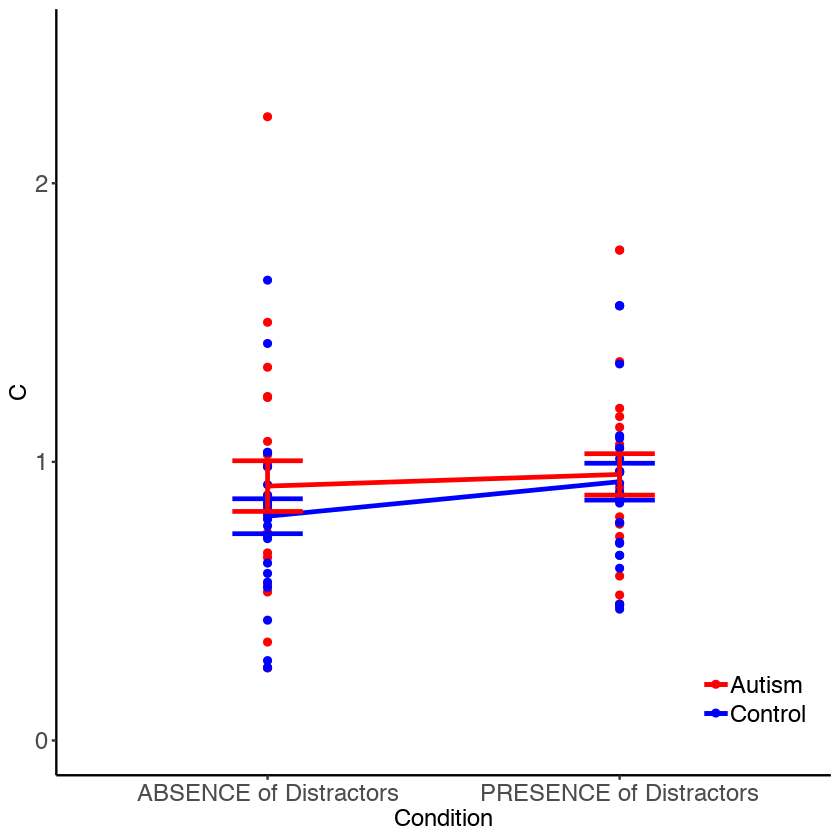

In [19]:
#plot data

ggplot(data = dataBeh) +
geom_point(mapping = aes(x = distractors, y = criterion)) +
aes(x = distractors, color = diagnosis, group = diagnosis, y = criterion) + 
stat_summary(fun.y = mean, geom = "line", size = 1) + 
stat_summary(fun.data = mean_se, geom = "errorbar", width = 0.2, size = 1) + 
scale_x_discrete(breaks = c("0","1"), labels = c("ABSENCE of Distractors","PRESENCE of Distractors")) +
scale_color_discrete(breaks = c("1","0"), labels = c("Autism","Control")) +
scale_color_manual(breaks = c("1","0"), labels = c("Autism", "Control"), values=c("blue", "red")) +
scale_y_continuous(breaks = 0:2,limits = c(0,2.5)) +
ylab("C") +
xlab("Condition") +
theme_classic() +
theme(legend.position=c(0.9,0.1)) +
theme(legend.title=element_blank()) +
theme(axis.text=element_text(size=14)) +
theme(axis.title=element_text(size=14)) +
theme(legend.text=element_text(size=14))

## RT (log-transformed)

In [20]:
#see effect of group and condition

con.fit = lmer(RT ~ diagnosis*distractors + (1 | subjectNumber), data = dataBeh)
summary(con.fit)
lme.dscore(con.fit,dataBeh,"lme4")

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: RT ~ diagnosis * distractors + (1 | subjectNumber)
   Data: dataBeh

REML criterion at convergence: -355.9

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.9623 -0.5467  0.0027  0.4221  2.1598 

Random effects:
 Groups        Name        Variance  Std.Dev.
 subjectNumber (Intercept) 0.0016442 0.04055 
 Residual                  0.0002424 0.01557 
Number of obs: 93, groups:  subjectNumber, 47

Fixed effects:
                         Estimate Std. Error        df t value Pr(>|t|)    
(Intercept)             -0.198889   0.008866 51.123779 -22.433   <2e-16 ***
diagnosis1              -0.019322   0.012674 51.123779  -1.524    0.134    
distractors1             0.002014   0.004494 44.117103   0.448    0.656    
diagnosis1:distractors1 -0.002019   0.006494 44.237626  -0.311    0.757    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
 

,t,df,d
diagnosis1,-1.5244910,51.12378,-0.42642570
distractors1,0.4482022,44.11710,0.13495856
diagnosis1:distractors1,-0.3109092,44.23763,-0.09349053


In [21]:
#compute Bayes factor for effect of group and condition

con.fit = lmer(RT ~ diagnosis*distractors + (1 | subjectNumber), data = dataBeh)
no.fit = lmer(RT ~ (1 | subjectNumber), data = dataBeh)
exp((BIC(con.fit)-BIC(no.fit))/2)

[1] 52235196

In [22]:
#check to see if meds affect results

con.fit = lmer(RT ~ meds*distractors + (1 | subjectNumber), data = dataAutBeh)
summary(con.fit)
lme.dscore(con.fit,dataAutBeh,"lme4")

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: RT ~ meds * distractors + (1 | subjectNumber)
   Data: dataAutBeh

REML criterion at convergence: -156.9

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-1.81896 -0.39242  0.09953  0.37258  1.97569 

Random effects:
 Groups        Name        Variance  Std.Dev.
 subjectNumber (Intercept) 0.0018852 0.04342 
 Residual                  0.0002436 0.01561 
Number of obs: 45, groups:  subjectNumber, 23

Fixed effects:
                    Estimate Std. Error        df t value Pr(>|t|)    
(Intercept)        -0.224342   0.014590 23.522851 -15.376 9.09e-14 ***
meds1               0.010848   0.019407 23.522851   0.559    0.581    
distractors1        0.006001   0.006980 20.109267   0.860    0.400    
meds1:distractors1 -0.010954   0.009442 20.185238  -1.160    0.260    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
            (Intr)

,t,df,d
meds1,0.5589795,23.52285,0.2305053
distractors1,0.8597240,20.10927,0.3834343
meds1:distractors1,-1.1600972,20.18524,-0.5164252


In [23]:
#compute Bayes factor for effect of meds

con.fit = lmer(RT ~ meds*distractors + (1 | subjectNumber), data = dataAutBeh)
no.fit = lmer(RT ~ (1 | subjectNumber), data = dataAutBeh)
exp((BIC(con.fit)-BIC(no.fit))/2)

[1] 11351910

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.


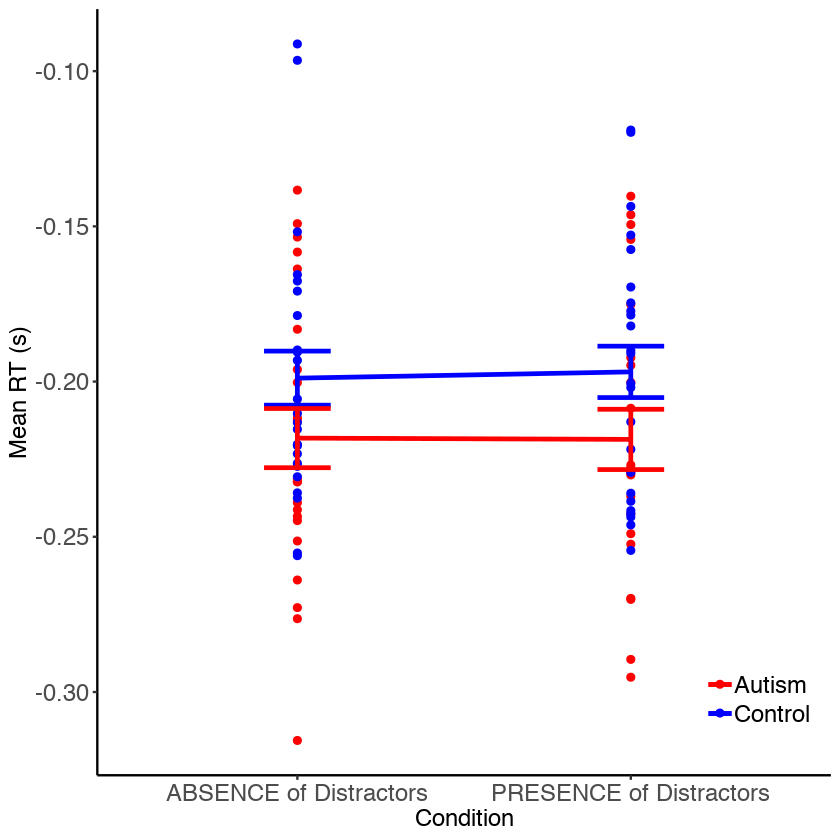

In [24]:
#plot data

ggplot(data = dataBeh) +
geom_point(mapping = aes(x = distractors, y = RT)) +
aes(x = distractors, color = diagnosis, group = diagnosis, y = RT) + 
stat_summary(fun.y = mean, geom = "line", size = 1) + 
stat_summary(fun.data = mean_se, geom = "errorbar", width = 0.2, size = 1) + 
scale_x_discrete(breaks = c("0","1"), labels = c("ABSENCE of Distractors","PRESENCE of Distractors")) +
scale_color_discrete(breaks = c("1","0"), labels = c("Autism","Control")) +
scale_color_manual(breaks = c("1","0"), labels = c("Autism", "Control"), values=c("blue", "red")) +
ylab("Mean RT (s)") +
xlab("Condition") +
theme_classic() +
theme(legend.position=c(0.9,0.1)) +
theme(legend.title=element_blank()) +
theme(axis.text=element_text(size=14)) +
theme(axis.title=element_text(size=14)) +
theme(legend.text=element_text(size=14))

# PUPILLOMETRY DATA ANALYSIS

## BASELINE PUPIL SIZE

In [25]:
#get subset of data for baseline pupil measurements only

dataBase = peakPupil %>%
subset(hit == 1 & FA == 0 & miss == 0 & aud == 0 & distractors == 0)

dataAutBase = dataAut %>%
subset(hit == 1 & FA == 0 & miss == 0 & aud == 0 & distractors == 0)

In [26]:
#see effect of group

con.fit = lm(baseline ~ diagnosis, data = dataBase)
summary(con.fit)
cohen.d(dataBase$baseline,dataBase$diagnosis,pooled=TRUE,paired=FALSE,na.rm=TRUE)


Call:
lm(formula = baseline ~ diagnosis, data = dataBase)

Residuals:
    Min      1Q  Median      3Q     Max 
-31.756  -9.246  -1.175   6.321  43.346 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  77.1579     2.9932  25.778   <2e-16 ***
diagnosis1    0.3844     4.3281   0.089     0.93    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 14.66 on 44 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.0001792,	Adjusted R-squared:  -0.02254 
F-statistic: 0.007886 on 1 and 44 DF,  p-value: 0.9296



Cohen's d

d estimate: -0.02621174 (negligible)
95 percent confidence interval:
     lower      upper 
-0.6210992  0.5686757 

In [27]:
#compute Bayes factor for effect of group

con.fit = lm(baseline ~ diagnosis, data = dataBase)
no.fit = lm(baseline ~ 1, data = dataBase)
exp((BIC(con.fit)-BIC(no.fit))/2)

[1] 6.754431

In [28]:
#check to see if meds affect results

con.fit = lm(baseline ~ meds, data = dataAutBase)
summary(con.fit)
cohen.d(dataAutBase$baseline,dataAutBase$meds,pooled=TRUE,paired=FALSE,na.rm=TRUE)


Call:
lm(formula = baseline ~ meds, data = dataAutBase)

Residuals:
    Min      1Q  Median      3Q     Max 
-20.614 -11.240   1.516  10.882  20.852 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   75.081      3.952  18.999 2.87e-14 ***
meds1          4.513      5.351   0.843    0.409    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 12.5 on 20 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.03435,	Adjusted R-squared:  -0.01394 
F-statistic: 0.7114 on 1 and 20 DF,  p-value: 0.409



Cohen's d

d estimate: -0.3611377 (small)
95 percent confidence interval:
     lower      upper 
-1.2614851  0.5392097 

In [29]:
#compute Bayes factor for effect of meds

con.fit = lm(baseline ~ meds, data = dataAutBase)
no.fit = lm(baseline ~ 1, data = dataAutBase)
exp((BIC(con.fit)-BIC(no.fit))/2)

[1] 3.193309

In [30]:
#check to see if age affects results

con.fit = lm(baseline ~ age, data = dataBase)
summary(con.fit)
cohen.d(dataBase$baseline,dataBase$age,pooled=TRUE,paired=FALSE,na.rm=TRUE)


Call:
lm(formula = baseline ~ age, data = dataBase)

Residuals:
    Min      1Q  Median      3Q     Max 
-23.540  -9.597  -0.530   6.587  40.213 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  94.4842     8.4578   11.17 1.97e-14 ***
age          -0.5677     0.2716   -2.09   0.0424 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 13.99 on 44 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.0903,	Adjusted R-squared:  0.06963 
F-statistic: 4.368 on 1 and 44 DF,  p-value: 0.04244



Cohen's d

d estimate: 4.088228 (large)
95 percent confidence interval:
   lower    upper 
3.364157 4.812299 

Warning message:
“Removed 1 rows containing non-finite values (stat_summary).”Warning message:
“Removed 1 rows containing missing values (geom_point).”

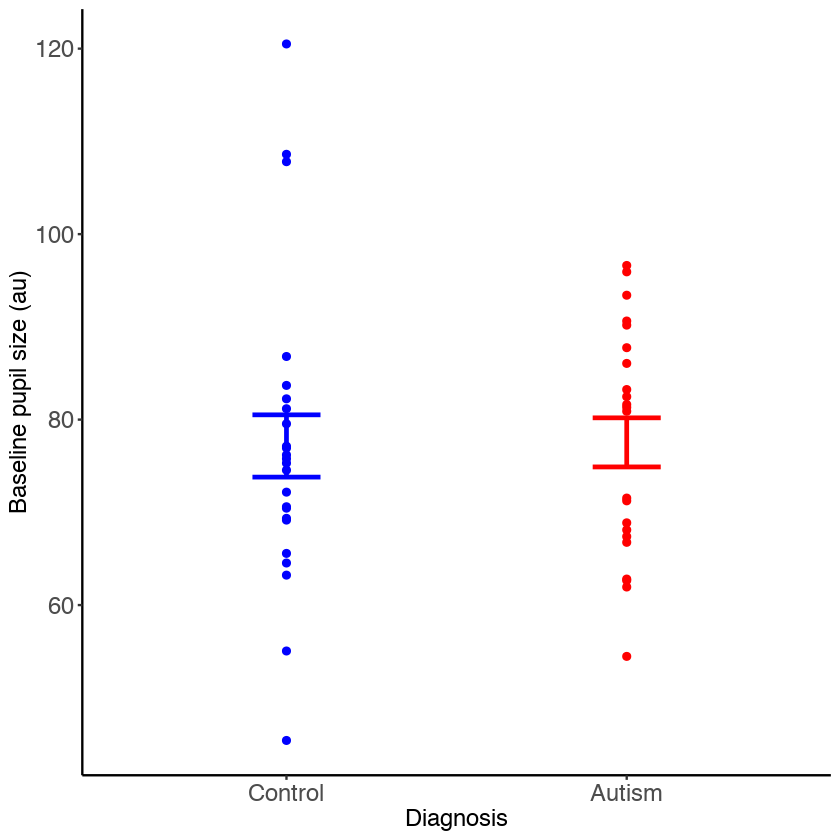

In [31]:
#plot data

ggplot(data = dataBase) +
geom_point(mapping = aes(x = diagnosis, y = baseline)) +
aes(x = diagnosis, color = diagnosis, y = baseline) + 
stat_summary(fun.data = mean_se, geom = "errorbar", width = 0.2, size = 1) + 
scale_x_discrete(breaks = c("1","0"), labels = c("Autism","Control")) +
scale_color_manual(breaks = c("1","0"), labels = c("Autism", "Control"), values=c("blue", "red")) +
#scale_y_continuous(limits = c(0.5,0.9)) +
ylab("Baseline pupil size (au)") +
xlab("Diagnosis") +
theme_classic() +
theme(legend.position="none") +
theme(axis.text=element_text(size=14)) +
theme(axis.title=element_text(size=14))

## PUPIL RESPONSE TO HITS

In [32]:
#get subset of data for pupil response to hits only

dataHit = peakPupil %>%
subset(hit == 1 & FA == 0 & miss == 0 & aud == 0)

dataAutHit = dataAut %>%
subset(hit == 1 & FA == 0 & miss == 0 & aud == 0)

dataConHit = dataHit %>%
subset(diagnosis == 0)

dataNoDisHit = dataHit %>%
subset(distractors == 0)

dataDisHit = dataHit %>%
subset(distractors == 1)

dataRatHit = peakPupil %>%
subset(hit == 1 & FA == 0 & miss == 0 & aud == 0 & distractors == 0)

In [33]:
#see effect of group and condition

con.fit = lmer(peak ~ diagnosis*distractors + (1 | subjectNumber), data = dataHit)
summary(con.fit)
lme.dscore(con.fit,dataHit,"lme4")

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: peak ~ diagnosis * distractors + (1 | subjectNumber)
   Data: dataHit

REML criterion at convergence: -849.1

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.5478 -0.5105 -0.1997  0.3793  3.3475 

Random effects:
 Groups        Name        Variance  Std.Dev.
 subjectNumber (Intercept) 2.472e-06 0.001572
 Residual                  1.932e-06 0.001390
Number of obs: 93, groups:  subjectNumber, 47

Fixed effects:
                          Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)              4.878e-03  4.284e-04  6.736e+01  11.386  < 2e-16 ***
diagnosis1               4.645e-05  6.124e-04  6.736e+01   0.076  0.93976    
distractors1             1.177e-03  4.013e-04  4.328e+01   2.933  0.00534 ** 
diagnosis1:distractors1 -1.772e-03  5.788e-04  4.363e+01  -3.062  0.00376 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixe

,t,df,d
diagnosis1,0.07584958,67.36248,0.01848307
distractors1,2.93349121,43.28374,0.89176909
diagnosis1:distractors1,-3.06207476,43.63018,-0.92715489


In [74]:
#posthoc tests for effect of group and diagnosis

me.fit = lmer(peak ~ diagnosis*distractors + (1  | subjectNumber), data = dataHit)
summary(me.fit)

MContrast = rbind(c(0,0,1,1),c(0,0,1,0),c(0,1,0,0),c(0,1,0,1))
Contrast = glht(me.fit,linfct=MContrast)
summary(Contrast)

MAutAut = matrix(c(0,0,1,1),1) #comparison of autism participants across the two conditions (null)
MConCon = matrix(c(0,0,1,0),1) #comparison of controls across the two conditions (null)
MAutConNoDis = matrix(c(0,1,0,0),1) #comparison of autism and control participants in the no distractor condition (null)
MAutConDis = matrix(c(0,1,0,1),1) #comparison of autism and control participants in the distractor condition (null)

AutAut = glht(me.fit,linfct = MAutAut)
summary(AutAut)
cohen.d(dataAutHit$peak,dataAutHit$distractors,pooled=TRUE,paired=FALSE,na.rm=TRUE)

ConCon = glht(me.fit,linfct = MConCon)
summary(ConCon)
cohen.d(dataConHit$peak,dataConHit$distractors,pooled=TRUE,paired=FALSE,na.rm=TRUE)

AutConNoDis = glht(me.fit,linfct = MAutConNoDis)
summary(AutConNoDis)
cohen.d(dataNoDisHit$peak,dataNoDisHit$diagnosis,pooled=TRUE,paired=FALSE,na.rm=TRUE)

AutConDis = glht(me.fit,linfct = MAutConDis)
summary(AutConDis)
cohen.d(dataDisHit$peak,dataDisHit$diagnosis,pooled=TRUE,paired=FALSE,na.rm=TRUE)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: peak ~ diagnosis * distractors + (1 | subjectNumber)
   Data: dataHit

REML criterion at convergence: -849.1

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.5478 -0.5105 -0.1997  0.3793  3.3475 

Random effects:
 Groups        Name        Variance  Std.Dev.
 subjectNumber (Intercept) 2.472e-06 0.001572
 Residual                  1.932e-06 0.001390
Number of obs: 93, groups:  subjectNumber, 47

Fixed effects:
                          Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)              4.878e-03  4.284e-04  6.736e+01  11.386  < 2e-16 ***
diagnosis1               4.645e-05  6.124e-04  6.736e+01   0.076  0.93976    
distractors1             1.177e-03  4.013e-04  4.328e+01   2.933  0.00534 ** 
diagnosis1:distractors1 -1.772e-03  5.788e-04  4.363e+01  -3.062  0.00376 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixe


	 Simultaneous Tests for General Linear Hypotheses

Fit: lmer(formula = peak ~ diagnosis * distractors + (1 | subjectNumber), 
    data = dataHit)

Linear Hypotheses:
         Estimate Std. Error z value Pr(>|z|)  
1 == 0 -5.952e-04  4.171e-04  -1.427   0.4289  
2 == 0  1.177e-03  4.013e-04   2.933   0.0124 *
3 == 0  4.645e-05  6.124e-04   0.076   0.9998  
4 == 0 -1.726e-03  6.172e-04  -2.796   0.0196 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
(Adjusted p values reported -- single-step method)



	 Simultaneous Tests for General Linear Hypotheses

Fit: lmer(formula = peak ~ diagnosis * distractors + (1 | subjectNumber), 
    data = dataHit)

Linear Hypotheses:
         Estimate Std. Error z value Pr(>|z|)
1 == 0 -0.0005952  0.0004171  -1.427    0.154
(Adjusted p values reported -- single-step method)



Cohen's d

d estimate: 0.3080003 (small)
95 percent confidence interval:
     lower      upper 
-0.2969632  0.9129637 


	 Simultaneous Tests for General Linear Hypotheses

Fit: lmer(formula = peak ~ diagnosis * distractors + (1 | subjectNumber), 
    data = dataHit)

Linear Hypotheses:
        Estimate Std. Error z value Pr(>|z|)   
1 == 0 0.0011772  0.0004013   2.933  0.00335 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
(Adjusted p values reported -- single-step method)



Cohen's d

d estimate: -0.6051192 (medium)
95 percent confidence interval:
      lower       upper 
-1.19934151 -0.01089688 


	 Simultaneous Tests for General Linear Hypotheses

Fit: lmer(formula = peak ~ diagnosis * distractors + (1 | subjectNumber), 
    data = dataHit)

Linear Hypotheses:
        Estimate Std. Error z value Pr(>|z|)
1 == 0 4.645e-05  6.124e-04   0.076     0.94
(Adjusted p values reported -- single-step method)



Cohen's d

d estimate: -0.02025026 (negligible)
95 percent confidence interval:
     lower      upper 
-0.6079727  0.5674722 


	 Simultaneous Tests for General Linear Hypotheses

Fit: lmer(formula = peak ~ diagnosis * distractors + (1 | subjectNumber), 
    data = dataHit)

Linear Hypotheses:
         Estimate Std. Error z value Pr(>|z|)   
1 == 0 -0.0017260  0.0006172  -2.796  0.00517 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
(Adjusted p values reported -- single-step method)



Cohen's d

d estimate: 0.9781212 (large)
95 percent confidence interval:
    lower     upper 
0.3487572 1.6074852 

In [35]:
#look at ratios

con.fit = glm(RatHit ~ diagnosis, data = dataRatHit)
summary(con.fit)
cohen.d(dataRatHit$RatHit,dataRatHit$diagnosis,pooled=TRUE,paired=FALSE,na.rm=TRUE)


Call:
glm(formula = RatHit ~ diagnosis, data = dataRatHit)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-0.70396  -0.27175  -0.02806   0.19696   1.39724  

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.33634    0.07886  16.946  < 2e-16 ***
diagnosis1  -0.35325    0.11403  -3.098  0.00339 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 0.1492523)

    Null deviance: 7.9994  on 45  degrees of freedom
Residual deviance: 6.5671  on 44  degrees of freedom
  (1 observation deleted due to missingness)
AIC: 47

Number of Fisher Scoring iterations: 2



Cohen's d

d estimate: 0.9143624 (large)
95 percent confidence interval:
    lower     upper 
0.2892449 1.5394800 

In [36]:
#check if meds affect results

con.fit = lmer(peak ~ meds*distractors + (1 | subjectNumber), data = dataAutHit)
summary(con.fit)
lme.dscore(con.fit,dataAutHit,"lme4")

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: peak ~ meds * distractors + (1 | subjectNumber)
   Data: dataAutHit

REML criterion at convergence: -382.3

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.2365 -0.5043 -0.2712  0.6680  2.8028 

Random effects:
 Groups        Name        Variance  Std.Dev.
 subjectNumber (Intercept) 2.501e-06 0.001581
 Residual                  2.314e-06 0.001521
Number of obs: 45, groups:  subjectNumber, 23

Fixed effects:
                     Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)         0.0059392  0.0006939 31.5718050   8.559 9.86e-10 ***
meds1              -0.0017961  0.0009230 31.5718050  -1.946   0.0606 .  
distractors1       -0.0012553  0.0006804 18.6976442  -1.845   0.0809 .  
meds1:distractors1  0.0011661  0.0009173 18.9582015   1.271   0.2190    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
            (Int

,t,df,d
meds1,-1.945921,31.57181,-0.6926367
distractors1,-1.845041,18.69764,-0.8533804
meds1:distractors1,1.271171,18.95820,0.5838957


In [37]:
#compute Bayes factor for effect of meds

con.fit = lmer(peak ~ meds*distractors + (1 | subjectNumber), data = dataAutHit)
summary(con.fit)
no.fit = lmer(peak ~ (1 | subjectNumber), data = dataAutHit)
summary(no.fit)
exp((BIC(con.fit)-BIC(no.fit))/2)
BIC(con.fit)
BIC(no.fit)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: peak ~ meds * distractors + (1 | subjectNumber)
   Data: dataAutHit

REML criterion at convergence: -382.3

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.2365 -0.5043 -0.2712  0.6680  2.8028 

Random effects:
 Groups        Name        Variance  Std.Dev.
 subjectNumber (Intercept) 2.501e-06 0.001581
 Residual                  2.314e-06 0.001521
Number of obs: 45, groups:  subjectNumber, 23

Fixed effects:
                     Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)         0.0059392  0.0006939 31.5718050   8.559 9.86e-10 ***
meds1              -0.0017961  0.0009230 31.5718050  -1.946   0.0606 .  
distractors1       -0.0012553  0.0006804 18.6976442  -1.845   0.0809 .  
meds1:distractors1  0.0011661  0.0009173 18.9582015   1.271   0.2190    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
            (Int

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: peak ~ (1 | subjectNumber)
   Data: dataAutHit

REML criterion at convergence: -414.8

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.4883 -0.5396 -0.2440  0.4734  3.2574 

Random effects:
 Groups        Name        Variance  Std.Dev.
 subjectNumber (Intercept) 2.702e-06 0.001644
 Residual                  2.432e-06 0.001559
Number of obs: 45, groups:  subjectNumber, 23

Fixed effects:
             Estimate Std. Error        df t value Pr(>|t|)    
(Intercept) 4.634e-03  4.149e-04 2.115e+01   11.17 2.49e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

[1] 3462709457

[1] -359.4316

[1] -403.3622

In [38]:
#check to see if age affects results

con.fit = lmer(peak ~ age*distractors + (1 | subjectNumber), data = dataHit)
summary(con.fit)
lme.dscore(con.fit,dataHit,"lme4")

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: peak ~ age * distractors + (1 | subjectNumber)
   Data: dataHit

REML criterion at convergence: -834.7

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.6954 -0.6340 -0.1630  0.4036  3.0884 

Random effects:
 Groups        Name        Variance  Std.Dev.
 subjectNumber (Intercept) 2.076e-06 0.001441
 Residual                  2.252e-06 0.001501
Number of obs: 93, groups:  subjectNumber, 47

Fixed effects:
                   Estimate Std. Error         df t value Pr(>|t|)   
(Intercept)       1.543e-03  1.256e-03  7.214e+01   1.228  0.22330   
age               1.113e-04  4.039e-05  7.214e+01   2.755  0.00742 **
distractors1      1.713e-03  1.281e-03  4.341e+01   1.337  0.18826   
age:distractors1 -4.605e-05  4.125e-05  4.346e+01  -1.116  0.27044   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
            (Intr) age    dstrc1
ag

,t,df,d
age,2.755369,72.1395,0.6488184
distractors1,1.336769,43.4089,0.4057859
age:distractors1,-1.116278,43.4558,-0.3386715


In [39]:
#see effect of clinical metrics

con.fit = lmer(peak ~ ADOSComm*distractors + ADOSSoc*distractors + ADOSBeh*distractors +  (1 | subjectNumber), data = dataAutHit)
summary(con.fit)
lme.dscore(con.fit,dataAutHit,"lme4")

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: peak ~ ADOSComm * distractors + ADOSSoc * distractors + ADOSBeh *  
    distractors + (1 | subjectNumber)
   Data: dataAutHit

REML criterion at convergence: -326

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.4354 -0.4111 -0.1963  0.3944  2.4007 

Random effects:
 Groups        Name        Variance  Std.Dev.
 subjectNumber (Intercept) 1.549e-06 0.001245
 Residual                  2.562e-06 0.001601
Number of obs: 45, groups:  subjectNumber, 23

Fixed effects:
                        Estimate Std. Error         df t value Pr(>|t|)   
(Intercept)            0.0033208  0.0017898 32.5389751   1.855  0.07262 . 
ADOSComm              -0.0005985  0.0003178 32.5389752  -1.883  0.06867 . 
distractors1          -0.0004047  0.0020481 18.6843169  -0.198  0.84551   
ADOSSoc                0.0006736  0.0002233 32.5389751   3.016  0.00494 **
ADOSBeh               -0.0005692  0.0002775 32.5

,t,df,d
ADOSComm,-1.8829991,32.53898,-0.66020402
distractors1,-0.1975740,18.68432,-0.09141579
ADOSSoc,3.0161326,32.53898,1.05749542
ADOSBeh,-2.0516108,32.53898,-0.71932149
ADOSComm:distractors1,0.6579368,19.13296,0.30083135
distractors1:ADOSSoc,-0.9534141,18.26471,-0.44617494
distractors1:ADOSBeh,1.0665610,18.93985,0.49014815


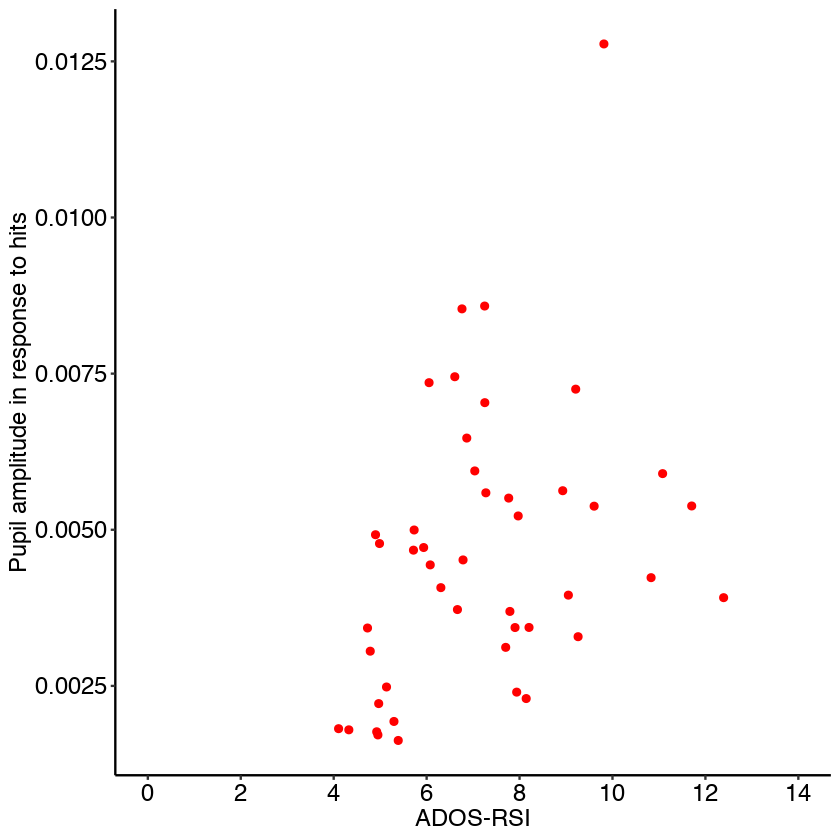

In [40]:
ggplot(data = dataAutHit) +
geom_jitter(aes(x = ADOSSoc, y = peak),color = "red") + 
scale_x_continuous(breaks = (c(0,2,4,6,8,10,12,14)),limits=c(0, 14)) +
ylab("Pupil amplitude in response to hits") +
xlab("ADOS-RSI") +
theme_classic() +
theme(axis.text=element_text(size=14, color = "black")) +
theme(axis.title=element_text(size=14, color = "black")) +
theme( axis.line = element_line(colour = "black", 
                      linetype = "solid")) +
theme(axis.text=element_text(face="bold")) +
theme(axis.title=element_text(face="bold"))

Warning message:
“Removed 5 rows containing missing values (geom_point).”

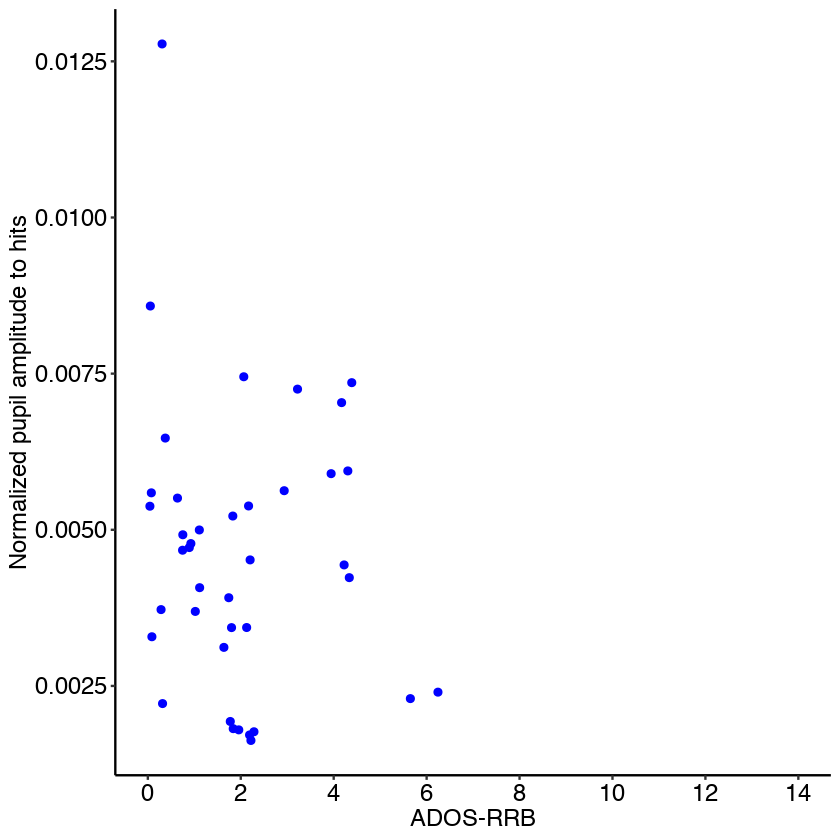

In [41]:
ggplot(data = dataAutHit) +
geom_jitter(aes(x = ADOSBeh, y = peak),color = "blue") + 
scale_x_continuous(breaks = (c(0,2,4,6,8,10,12,14)),limits=c(0, 14)) +
#scale_y_continuous(breaks = (c(0.005,0.01,0.015,0.02)),limits=c(0, 0.02)) +
ylab("Normalized pupil amplitude to hits") +
xlab("ADOS-RRB") +
theme_classic() +
theme(axis.text=element_text(size=14, color = "black")) +
theme(axis.title=element_text(size=14, color = "black")) +
theme(legend.text=element_text(size=14)) +
 theme( axis.line = element_line(colour = "black", 
                      linetype = "solid"))

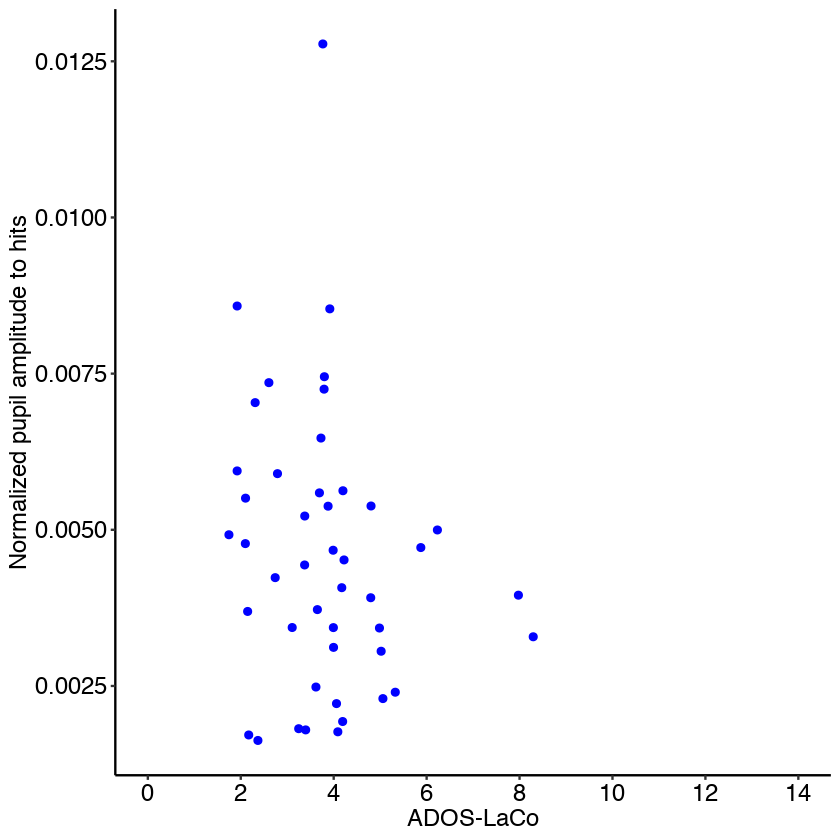

In [42]:
ggplot(data = dataAutHit) +
geom_jitter(aes(x = ADOSComm, y = peak),color = "blue") +
scale_x_continuous(breaks = (c(0,2,4,6,8,10,12,14)),limits=c(0, 14)) +
#scale_y_continuous(breaks = (c(0.005,0.01,0.015,0.02)),limits=c(0, 0.02)) +
ylab("Normalized pupil amplitude to hits") +
xlab("ADOS-LaCo") +
theme_classic() +
theme(axis.text=element_text(size=14, color = "black")) +
theme(axis.title=element_text(size=14, color = "black")) +
theme(legend.text=element_text(size=14)) +
 theme( axis.line = element_line(colour = "black", 
                      linetype = "solid"))

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.


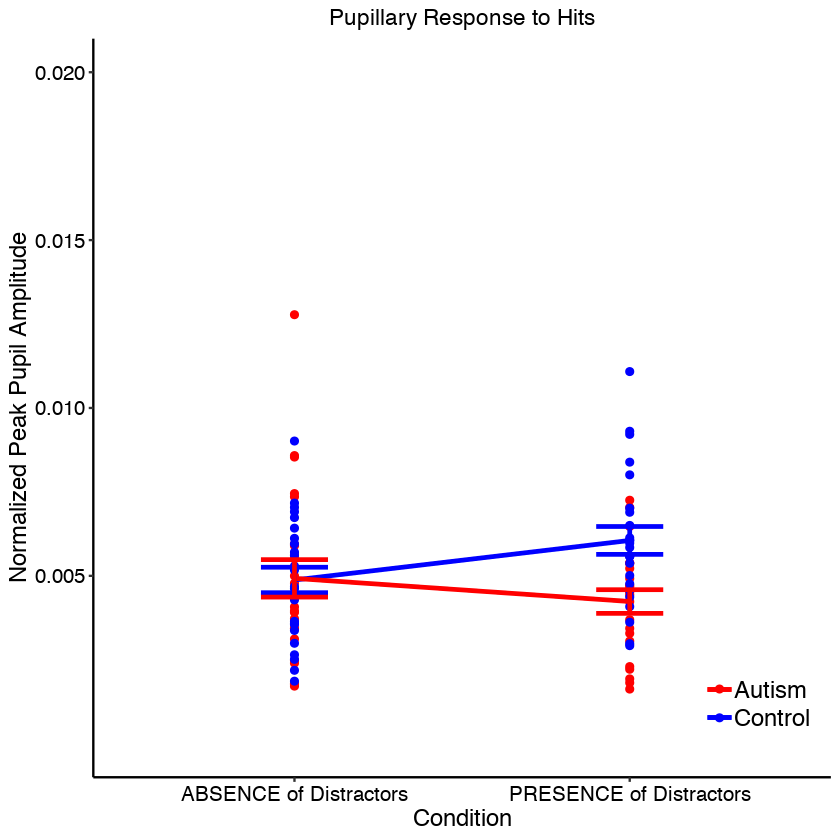

In [43]:
#plot data

ggplot(data = dataHit) +
geom_point(mapping = aes(x = distractors, y = peak)) +
aes(x = distractors, color = diagnosis, group = diagnosis, y = peak) + 
stat_summary(fun.y = mean, geom = "line", size = 1) + 
stat_summary(fun.data = mean_se, geom = "errorbar", width = 0.2, size = 1) + 
scale_x_discrete(breaks = c("0","1"), labels = c("ABSENCE of Distractors","PRESENCE of Distractors")) +
scale_color_discrete(breaks = c("1","0"), labels = c("Autism","Control")) +
scale_color_manual(breaks = c("1","0"), labels = c("Autism", "Control"), values=c("blue", "red")) +
scale_y_continuous(breaks = (c(0.005,0.01,0.015,0.02)),limits=c(0, 0.02)) +
ylab("Normalized Peak Pupil Amplitude") +
xlab("Condition") +
theme_classic() +
theme(legend.position=c(0.9,0.1)) +
theme(legend.title=element_blank()) +
theme(axis.text=element_text(size=12, color = "black")) +
theme(axis.title=element_text(size=14, color = "black")) +
theme(legend.text=element_text(size=14)) +
 theme( axis.line = element_line(colour = "black", 
                      linetype = "solid"))+
ggtitle("Pupillary Response to Hits") +
  theme(plot.title = element_text(hjust = 0.5))

## PUPIL RESPONSE TO FALSE ALARMS

In [44]:
#get subset of data for pupil response to FAs only

dataFA = peakPupil %>%
subset(hit == 0 & FA == 1 & miss == 0 & aud == 0)

dataAutFA = dataAut %>%
subset(hit == 0 & FA == 1 & miss == 0 & aud == 0)

dataConFA = dataFA %>%
subset(diagnosis == 0)

dataNoDisFA = dataFA %>%
subset(distractors == 0)

dataDisFA = dataFA %>%
subset(distractors == 1)

dataRatFA = peakPupil %>%
subset(hit == 0 & FA == 1 & miss == 0 & aud == 0 & distractors == 0)

In [45]:
#see effect of group and condition

con.fit = lmer(peak ~ diagnosis*distractors + (1 | subjectNumber), data = dataFA)
summary(con.fit)
lme.dscore(con.fit,dataFA,"lme4")

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: peak ~ diagnosis * distractors + (1 | subjectNumber)
   Data: dataFA

REML criterion at convergence: -735.4

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-1.63983 -0.59613 -0.02414  0.55049  2.02502 

Random effects:
 Groups        Name        Variance  Std.Dev.
 subjectNumber (Intercept) 4.641e-06 0.002154
 Residual                  5.319e-06 0.002306
Number of obs: 89, groups:  subjectNumber, 46

Fixed effects:
                          Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)              0.0082893  0.0006442 70.4591524  12.868   <2e-16 ***
diagnosis1               0.0001570  0.0009315 70.4591524   0.169   0.8666    
distractors1             0.0007743  0.0006876 42.7786858   1.126   0.2664    
diagnosis1:distractors1 -0.0026181  0.0009865 42.4388166  -2.654   0.0112 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlatio

,t,df,d
diagnosis1,0.1685608,70.45915,0.04016224
distractors1,1.1260955,42.77869,0.34434319
diagnosis1:distractors1,-2.6539391,42.43882,-0.81477803


In [75]:
#posthoc tests for effect of group and condition

me.fit = lmer(peak ~ diagnosis*distractors + (1  | subjectNumber), data = dataFA)
summary(me.fit)

MContrast = rbind(c(0,0,1,1),c(0,0,1,0),c(0,1,0,0),c(0,1,0,1))
Contrast = glht(me.fit,linfct=MContrast)
summary(Contrast)

MAutAut = matrix(c(0,0,1,1),1) #comparison of autism participants across the two conditions (null)
MConCon = matrix(c(0,0,1,0),1) #comparison of controls across the two conditions (null)
MAutConNoDis = matrix(c(0,1,0,0),1) #comparison of autism and control participants in the no distractor condition (null)
MAutConDis = matrix(c(0,1,0,1),1) #comparison of autism and control participants in the distractor condition (null)

AutAut = glht(me.fit,linfct = MAutAut)
summary(AutAut)
cohen.d(dataAutFA$peak,dataAutFA$distractors,pooled=TRUE,paired=FALSE,na.rm=TRUE)

ConCon = glht(me.fit,linfct = MConCon)
summary(ConCon)
cohen.d(dataConFA$peak,dataConFA$distractors,pooled=TRUE,paired=FALSE,na.rm=TRUE)

AutConNoDis = glht(me.fit,linfct = MAutConNoDis)
summary(AutConNoDis)
cohen.d(dataNoDisFA$peak,dataNoDisFA$diagnosis,pooled=TRUE,paired=FALSE,na.rm=TRUE)

AutConDis = glht(me.fit,linfct = MAutConDis)
summary(AutConDis)
cohen.d(dataDisFA$peak,dataDisFA$diagnosis,pooled=TRUE,paired=FALSE,na.rm=TRUE)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: peak ~ diagnosis * distractors + (1 | subjectNumber)
   Data: dataFA

REML criterion at convergence: -735.4

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-1.63983 -0.59613 -0.02414  0.55049  2.02502 

Random effects:
 Groups        Name        Variance  Std.Dev.
 subjectNumber (Intercept) 4.641e-06 0.002154
 Residual                  5.319e-06 0.002306
Number of obs: 89, groups:  subjectNumber, 46

Fixed effects:
                          Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)              0.0082893  0.0006442 70.4591524  12.868   <2e-16 ***
diagnosis1               0.0001570  0.0009315 70.4591524   0.169   0.8666    
distractors1             0.0007743  0.0006876 42.7786858   1.126   0.2664    
diagnosis1:distractors1 -0.0026181  0.0009865 42.4388166  -2.654   0.0112 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlatio


	 Simultaneous Tests for General Linear Hypotheses

Fit: lmer(formula = peak ~ diagnosis * distractors + (1 | subjectNumber), 
    data = dataFA)

Linear Hypotheses:
         Estimate Std. Error z value Pr(>|z|)  
1 == 0 -0.0018438  0.0007074  -2.606   0.0337 *
2 == 0  0.0007743  0.0006876   1.126   0.6262  
3 == 0  0.0001570  0.0009315   0.169   0.9979  
4 == 0 -0.0024611  0.0009561  -2.574   0.0369 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
(Adjusted p values reported -- single-step method)



	 Simultaneous Tests for General Linear Hypotheses

Fit: lmer(formula = peak ~ diagnosis * distractors + (1 | subjectNumber), 
    data = dataFA)

Linear Hypotheses:
         Estimate Std. Error z value Pr(>|z|)   
1 == 0 -0.0018438  0.0007074  -2.606  0.00915 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
(Adjusted p values reported -- single-step method)



Cohen's d

d estimate: 0.6725187 (medium)
95 percent confidence interval:
     lower      upper 
0.03923019 1.30580719 


	 Simultaneous Tests for General Linear Hypotheses

Fit: lmer(formula = peak ~ diagnosis * distractors + (1 | subjectNumber), 
    data = dataFA)

Linear Hypotheses:
        Estimate Std. Error z value Pr(>|z|)
1 == 0 0.0007743  0.0006876   1.126     0.26
(Adjusted p values reported -- single-step method)



Cohen's d

d estimate: -0.2429301 (small)
95 percent confidence interval:
     lower      upper 
-0.8399781  0.3541178 


	 Simultaneous Tests for General Linear Hypotheses

Fit: lmer(formula = peak ~ diagnosis * distractors + (1 | subjectNumber), 
    data = dataFA)

Linear Hypotheses:
        Estimate Std. Error z value Pr(>|z|)
1 == 0 0.0001570  0.0009315   0.169    0.866
(Adjusted p values reported -- single-step method)



Cohen's d

d estimate: -0.05526657 (negligible)
95 percent confidence interval:
     lower      upper 
-0.6502419  0.5397088 


	 Simultaneous Tests for General Linear Hypotheses

Fit: lmer(formula = peak ~ diagnosis * distractors + (1 | subjectNumber), 
    data = dataFA)

Linear Hypotheses:
         Estimate Std. Error z value Pr(>|z|)  
1 == 0 -0.0024611  0.0009561  -2.574   0.0101 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
(Adjusted p values reported -- single-step method)



Cohen's d

d estimate: 0.7537644 (medium)
95 percent confidence interval:
    lower     upper 
0.1161517 1.3913770 

In [47]:
#look at ratios

con.fit = glm(RatFA ~ diagnosis, data = dataRatFA)
summary(con.fit)
cohen.d(dataRatFA$RatFA,dataRatFA$diagnosis,pooled=TRUE,paired=FALSE,na.rm=TRUE)


Call:
glm(formula = RatFA ~ diagnosis, data = dataRatFA)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-0.73565  -0.32022  -0.03858   0.29763   0.73873  

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.16983    0.08581  13.633  < 2e-16 ***
diagnosis1  -0.35034    0.12279  -2.853  0.00675 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 0.161989)

    Null deviance: 7.9603  on 42  degrees of freedom
Residual deviance: 6.6415  on 41  degrees of freedom
  (3 observations deleted due to missingness)
AIC: 47.711

Number of Fisher Scoring iterations: 2



Cohen's d

d estimate: 0.8704683 (large)
95 percent confidence interval:
    lower     upper 
0.2258448 1.5150919 

In [48]:
#check if meds affect results

con.fit = lmer(peak ~ meds*distractors + (1 | subjectNumber), data = dataAutFA)
summary(con.fit)
lme.dscore(con.fit,dataAutFA,"lme4")

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: peak ~ meds * distractors + (1 | subjectNumber)
   Data: dataAutFA

REML criterion at convergence: -338.4

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-1.27102 -0.71696 -0.06949  0.60667  2.37042 

Random effects:
 Groups        Name        Variance  Std.Dev.
 subjectNumber (Intercept) 3.339e-06 0.001827
 Residual                  5.148e-06 0.002269
Number of obs: 43, groups:  subjectNumber, 22

Fixed effects:
                     Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)         0.0076802  0.0009212 33.6895110   8.337 1.06e-09 ***
meds1               0.0014045  0.0012474 33.6895110   1.126    0.268    
distractors1       -0.0007705  0.0010147 18.6218149  -0.759    0.457    
meds1:distractors1 -0.0020444  0.0013935 18.9518385  -1.467    0.159    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
       

,t,df,d
meds1,1.1260097,33.68951,0.3879938
distractors1,-0.7594056,18.62181,-0.3519596
meds1:distractors1,-1.4670872,18.95184,-0.6740005


In [49]:
#compute Bayes factor for effect of meds

con.fit = lmer(peak ~ meds*distractors + (1 | subjectNumber), data = dataAutFA)
no.fit = lmer(peak ~ (1 | subjectNumber), data = dataAutFA)
exp((BIC(con.fit)-BIC(no.fit))/2)

[1] 233732511

In [50]:
#check if age affects results

con.fit = lmer(peak ~ age*distractors + (1 | subjectNumber), data = dataFA)
summary(con.fit)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: peak ~ age * distractors + (1 | subjectNumber)
   Data: dataFA

REML criterion at convergence: -716.7

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-1.68075 -0.55059 -0.03519  0.57514  2.05170 

Random effects:
 Groups        Name        Variance  Std.Dev.
 subjectNumber (Intercept) 4.661e-06 0.002159
 Residual                  6.067e-06 0.002463
Number of obs: 89, groups:  subjectNumber, 46

Fixed effects:
                   Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)       9.898e-03  2.007e-03  7.211e+01   4.932 5.05e-06 ***
age              -5.056e-05  6.423e-05  7.211e+01  -0.787    0.434    
distractors1     -1.347e-03  2.147e-03  4.176e+01  -0.628    0.534    
age:distractors1  2.778e-05  6.844e-05  4.157e+01   0.406    0.687    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
            (Intr) ag

In [51]:
#compute Bayes factor for effect of age

con.fit = lmer(peak ~ age*distractors + (1 | subjectNumber), data = dataFA)
no.fit = lmer(peak ~ (1 | subjectNumber), data = dataFA)
exp((BIC(con.fit)-BIC(no.fit))/2)

[1] 1.266801e+13

In [52]:
#see effect of clinical metrics

con.fit = lmer(peak ~ ADOSComm*distractors + ADOSSoc*distractors + ADOSBeh*distractors +  (1 | subjectNumber), data = dataAutFA)
summary(con.fit)
lme.dscore(con.fit,dataAutFA,"lme4")

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: peak ~ ADOSComm * distractors + ADOSSoc * distractors + ADOSBeh *  
    distractors + (1 | subjectNumber)
   Data: dataAutFA

REML criterion at convergence: -283.8

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-1.72206 -0.42869 -0.03155  0.40909  1.58408 

Random effects:
 Groups        Name        Variance  Std.Dev.
 subjectNumber (Intercept) 2.702e-06 0.001644
 Residual                  5.155e-06 0.002270
Number of obs: 43, groups:  subjectNumber, 22

Fixed effects:
                        Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)            0.0133872  0.0025500 31.1029689   5.250 1.04e-05 ***
ADOSComm              -0.0002705  0.0004399 31.1029689  -0.615    0.543    
distractors1          -0.0029841  0.0029347 16.4245774  -1.017    0.324    
ADOSSoc               -0.0005079  0.0003152 31.1029689  -1.612    0.117    
ADOSBeh               -0.0001276

,t,df,d
ADOSComm,-0.6148703,31.10297,-0.2205020
distractors1,-1.0168148,16.42458,-0.5017932
ADOSSoc,-1.6115568,31.10297,-0.5779293
ADOSBeh,-0.3275493,31.10297,-0.1174643
ADOSComm:distractors1,-0.8475045,16.31994,-0.4195781
distractors1:ADOSSoc,1.4699100,16.31950,0.7277251
distractors1:ADOSBeh,-1.3456489,16.76287,-0.6573363


Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.


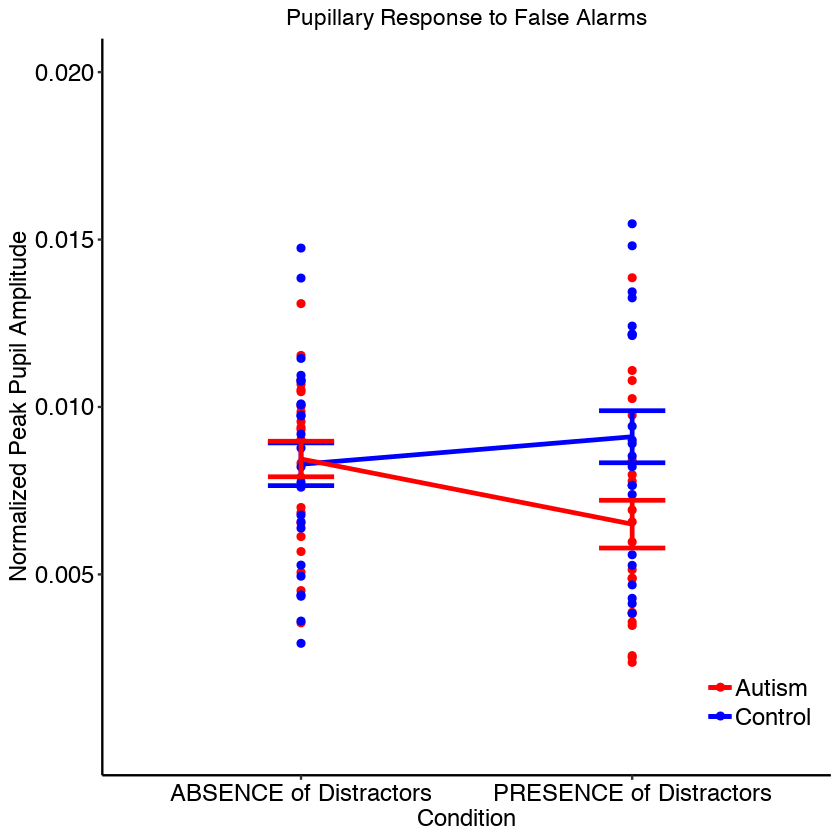

In [53]:
#plot data

ggplot(data = dataFA) +
geom_point(mapping = aes(x = distractors, y = peak)) +
aes(x = distractors, color = diagnosis, group = diagnosis, y = peak) + 
stat_summary(fun.y = mean, geom = "line", size = 1) + 
stat_summary(fun.data = mean_se, geom = "errorbar", width = 0.2, size = 1) + 
scale_x_discrete(breaks = c("0","1"), labels = c("ABSENCE of Distractors","PRESENCE of Distractors")) +
scale_color_discrete(breaks = c("1","0"), labels = c("Autism","Control")) +
scale_color_manual(breaks = c("1","0"), labels = c("Autism", "Control"), values=c("blue", "red")) +
scale_y_continuous(breaks = (c(0.005,0.01,0.015,0.02)),limits=c(0, 0.02)) +
ylab("Normalized Peak Pupil Amplitude") +
xlab("Condition") +
theme_classic() +
theme(legend.position=c(0.9,0.1)) +
theme(legend.title=element_blank()) +
theme(axis.text=element_text(size=14, color = "black")) +
theme(axis.title=element_text(size=14, color = "black")) +
theme(legend.text=element_text(size=14)) +
 theme( axis.line = element_line(colour = "black", 
                      linetype = "solid"))+
ggtitle("Pupillary Response to False Alarms")+
  theme(plot.title = element_text(hjust = 0.5))

## PUPIL RESPONSES TO MISSES

In [54]:
#get subset of data for only pupil responses to misses

dataMiss = peakPupil %>%
subset(hit == 0 & FA == 0 & miss == 1 & aud == 0)

dataAutMiss = dataAut %>%
subset(hit == 0 & FA == 0 & miss == 1 & aud == 0)

dataRatMiss = peakPupil %>%
subset(hit == 0 & FA == 0 & miss == 1 & aud == 0 & distractors == 0)

In [55]:
#see effect of group and condition

con.fit = lmer(peak ~ diagnosis*distractors + (1 | subjectNumber), data = dataMiss)
summary(con.fit)
lme.dscore(con.fit,dataMiss,"lme4")

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: peak ~ diagnosis * distractors + (1 | subjectNumber)
   Data: dataMiss

REML criterion at convergence: -786

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.4591 -0.4996 -0.1145  0.3731  3.1913 

Random effects:
 Groups        Name        Variance  Std.Dev.
 subjectNumber (Intercept) 3.813e-06 0.001953
 Residual                  3.900e-06 0.001975
Number of obs: 92, groups:  subjectNumber, 46

Fixed effects:
                          Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)              0.0064343  0.0005669 70.7186487  11.350   <2e-16 ***
diagnosis1              -0.0018669  0.0008197 70.7186487  -2.277   0.0258 *  
distractors1            -0.0016646  0.0005701 44.0000004  -2.920   0.0055 ** 
diagnosis1:distractors1  0.0011599  0.0008244 44.0000004   1.407   0.1664    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed

,t,df,d
diagnosis1,-2.277473,70.71865,-0.5416470
distractors1,-2.919794,44.00000,-0.8803511
diagnosis1:distractors1,1.407085,44.00000,0.4242521


In [56]:
#compute Bayes factor for effect of group and condition

con.fit = lmer(peak ~ diagnosis*distractors + (1 | subjectNumber), data = dataMiss)
summary(con.fit)
no.fit = lmer(peak ~ (1 | subjectNumber), data = dataMiss)
summary(no.fit)
BIC(con.fit)
BIC(no.fit)
exp((BIC(con.fit)-BIC(no.fit))/2)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: peak ~ diagnosis * distractors + (1 | subjectNumber)
   Data: dataMiss

REML criterion at convergence: -786

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.4591 -0.4996 -0.1145  0.3731  3.1913 

Random effects:
 Groups        Name        Variance  Std.Dev.
 subjectNumber (Intercept) 3.813e-06 0.001953
 Residual                  3.900e-06 0.001975
Number of obs: 92, groups:  subjectNumber, 46

Fixed effects:
                          Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)              0.0064343  0.0005669 70.7186487  11.350   <2e-16 ***
diagnosis1              -0.0018669  0.0008197 70.7186487  -2.277   0.0258 *  
distractors1            -0.0016646  0.0005701 44.0000004  -2.920   0.0055 ** 
diagnosis1:distractors1  0.0011599  0.0008244 44.0000004   1.407   0.1664    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: peak ~ (1 | subjectNumber)
   Data: dataMiss

REML criterion at convergence: -812.9

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.3976 -0.5701 -0.1204  0.3961  3.5551 

Random effects:
 Groups        Name        Variance  Std.Dev.
 subjectNumber (Intercept) 3.800e-06 0.001949
 Residual                  4.514e-06 0.002125
Number of obs: 92, groups:  subjectNumber, 46

Fixed effects:
             Estimate Std. Error        df t value Pr(>|t|)    
(Intercept) 4.986e-03  3.629e-04 4.500e+01   13.74   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

[1] -758.9169

[1] -799.2963

[1] 586496694

In [57]:
#look at ratios

con.fit = glm(RatMiss ~ diagnosis, data = dataRatMiss)
summary(con.fit)
cohen.d(dataRatMiss$RatMiss,dataRatMiss$diagnosis,pooled=TRUE,paired=FALSE,na.rm=TRUE)


Call:
glm(formula = RatMiss ~ diagnosis, data = dataRatMiss)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.6873  -0.3474  -0.1305   0.3019   1.2894  

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.85634    0.09384   9.126 1.04e-11 ***
diagnosis1   0.05577    0.13569   0.411    0.683    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 0.2113363)

    Null deviance: 9.3345  on 45  degrees of freedom
Residual deviance: 9.2988  on 44  degrees of freedom
AIC: 63

Number of Fisher Scoring iterations: 2



Cohen's d

d estimate: -0.1213146 (negligible)
95 percent confidence interval:
     lower      upper 
-0.7167225  0.4740932 

In [58]:
con.fit = glm(RatMiss ~ diagnosis, data = dataRatMiss)
no.fit = glm(RatMiss ~ 1, data = dataRatMiss)
exp((BIC(con.fit)-BIC(no.fit))/2)

[1] 6.210158

In [59]:
#check if meds affect results

con.fit = lmer(peak ~ meds*distractors + (1 | subjectNumber), data = dataAutMiss)
summary(con.fit)
lme.dscore(con.fit,dataAutMiss,"lme4")

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: peak ~ meds * distractors + (1 | subjectNumber)
   Data: dataAutMiss

REML criterion at convergence: -373.8

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.1501 -0.4832 -0.0822  0.3244  2.5865 

Random effects:
 Groups        Name        Variance  Std.Dev.
 subjectNumber (Intercept) 3.171e-06 0.001781
 Residual                  1.958e-06 0.001399
Number of obs: 44, groups:  subjectNumber, 22

Fixed effects:
                     Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)         0.0044021  0.0007162 28.9390761   6.146 1.08e-06 ***
meds1               0.0003029  0.0009698 28.9390761   0.312   0.7570    
distractors1        0.0004485  0.0006258 20.0000003   0.717   0.4819    
meds1:distractors1 -0.0017474  0.0008474 20.0000003  -2.062   0.0524 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
            (In

,t,df,d
meds1,0.3123596,28.93908,0.1161295
distractors1,0.7166745,20.00000,0.3205066
meds1:distractors1,-2.0621286,20.00000,-0.9222119


In [60]:
#compute Bayes factor for effect of meds

con.fit = lmer(peak ~ meds*distractors + (1 | subjectNumber), data = dataAutMiss)
summary(con.fit)
no.fit = lmer(peak ~ (1 | subjectNumber), data = dataAutMiss)
summary(no.fit)
BIC(con.fit)
BIC(no.fit)
exp((BIC(con.fit)-BIC(no.fit))/2)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: peak ~ meds * distractors + (1 | subjectNumber)
   Data: dataAutMiss

REML criterion at convergence: -373.8

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.1501 -0.4832 -0.0822  0.3244  2.5865 

Random effects:
 Groups        Name        Variance  Std.Dev.
 subjectNumber (Intercept) 3.171e-06 0.001781
 Residual                  1.958e-06 0.001399
Number of obs: 44, groups:  subjectNumber, 22

Fixed effects:
                     Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)         0.0044021  0.0007162 28.9390761   6.146 1.08e-06 ***
meds1               0.0003029  0.0009698 28.9390761   0.312   0.7570    
distractors1        0.0004485  0.0006258 20.0000003   0.717   0.4819    
meds1:distractors1 -0.0017474  0.0008474 20.0000003  -2.062   0.0524 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
            (In

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: peak ~ (1 | subjectNumber)
   Data: dataAutMiss

REML criterion at convergence: -406.2

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-1.56676 -0.52281  0.01604  0.49685  2.08477 

Random effects:
 Groups        Name        Variance  Std.Dev.
 subjectNumber (Intercept) 2.895e-06 0.001701
 Residual                  2.286e-06 0.001512
Number of obs: 44, groups:  subjectNumber, 22

Fixed effects:
             Estimate Std. Error        df t value Pr(>|t|)    
(Intercept) 4.315e-03  4.284e-04 2.100e+01   10.07 1.71e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

[1] -351.0543

[1] -394.8446

[1] 3228110004

In [61]:
#check if age affects results

con.fit = lmer(peak ~ age*distractors + (1 | subjectNumber), data = dataMiss)
summary(con.fit)
lme.dscore(con.fit,dataMiss,"lme4")

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: peak ~ age * distractors + (1 | subjectNumber)
   Data: dataMiss

REML criterion at convergence: -778.7

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.2629 -0.5350 -0.1592  0.4506  3.2674 

Random effects:
 Groups        Name        Variance  Std.Dev.
 subjectNumber (Intercept) 3.395e-06 0.001842
 Residual                  3.900e-06 0.001975
Number of obs: 92, groups:  subjectNumber, 46

Fixed effects:
                   Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)       1.044e-02  1.684e-03  7.233e+01   6.199 3.15e-08 ***
age              -1.640e-04  5.481e-05  7.233e+01  -2.993  0.00378 ** 
distractors1     -3.492e-03  1.741e-03  4.400e+01  -2.006  0.05106 .  
age:distractors1  7.982e-05  5.668e-05  4.400e+01   1.408  0.16609    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
            (Intr) age    dst

,t,df,d
age,-2.992771,72.33439,-0.7037705
distractors1,-2.005705,44.00000,-0.6047428
age:distractors1,1.408247,44.00000,0.4246023


In [62]:
#see effect of clinical metrics

con.fit = lmer(peak ~ ADOSComm*distractors + ADOSSoc*distractors + ADOSBeh*distractors +  (1 | subjectNumber), data = dataAutMiss)
summary(con.fit)
lme.dscore(con.fit,dataAutMiss,"lme4")

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: peak ~ ADOSComm * distractors + ADOSSoc * distractors + ADOSBeh *  
    distractors + (1 | subjectNumber)
   Data: dataAutMiss

REML criterion at convergence: -314.8

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-1.51729 -0.38128 -0.04928  0.36435  1.97165 

Random effects:
 Groups        Name        Variance  Std.Dev.
 subjectNumber (Intercept) 3.415e-06 0.001848
 Residual                  1.854e-06 0.001362
Number of obs: 44, groups:  subjectNumber, 22

Fixed effects:
                        Estimate Std. Error         df t value Pr(>|t|)   
(Intercept)            6.295e-03  2.027e-03  2.535e+01   3.106  0.00462 **
ADOSComm               1.427e-04  3.880e-04  2.535e+01   0.368  0.71602   
distractors1          -2.356e-05  1.700e-03  1.800e+01  -0.014  0.98910   
ADOSSoc               -4.031e-04  2.594e-04  2.535e+01  -1.554  0.13255   
ADOSBeh                3.823e-04  3

,t,df,d
ADOSComm,0.36786941,25.35147,0.146124172
distractors1,-0.01385705,18.00003,-0.006532271
ADOSSoc,-1.55412384,25.35147,-0.617325211
ADOSBeh,1.21681923,25.35147,0.483341913
ADOSComm:distractors1,-1.04771429,18.00003,-0.493896829
distractors1:ADOSSoc,1.26658354,18.00003,0.597072690
distractors1:ADOSBeh,-2.67424967,18.00003,-1.260652297


In [63]:
#compute Bayes factor for effect of clinical metrics

con.fit = lmer(peak ~ ADOSSocComm + ADOSBeh + FIQ + ADOSSocComm*distractors + ADOSBeh*distractors + FIQ*distractors + (1 | subjectNumber), data = dataAutMiss)
no.fit = lm(peak ~ 1, data = dataAutFA)
exp((BIC(con.fit)-BIC(no.fit))/2)

[1] 3.745914e+22

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.


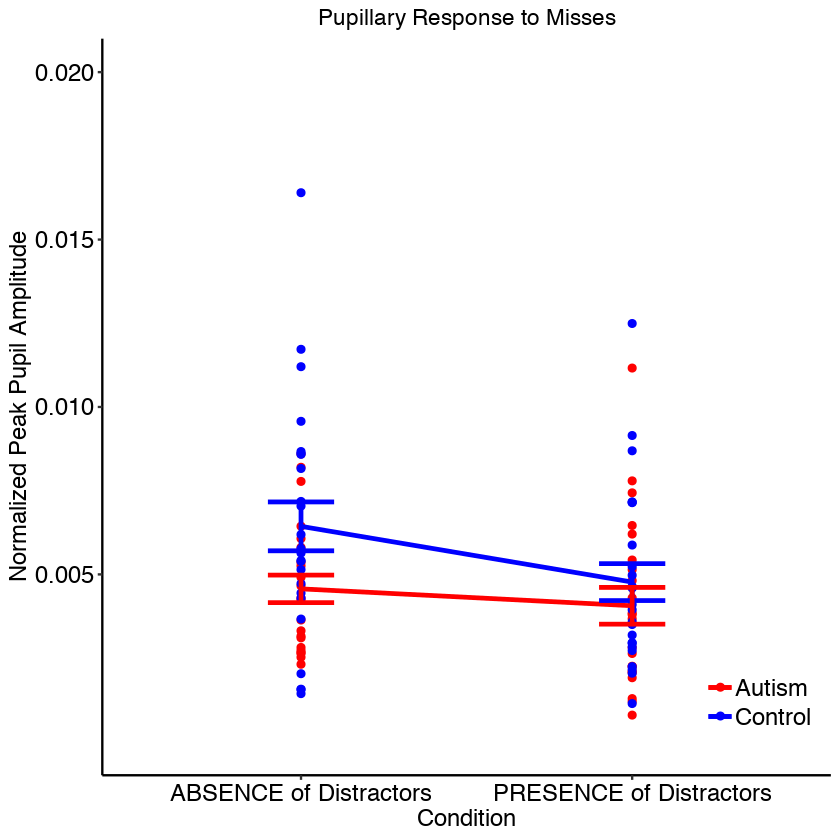

In [64]:
#plot data

ggplot(data = dataMiss) +
geom_point(mapping = aes(x = distractors, y = peak)) +
aes(x = distractors, color = diagnosis, group = diagnosis, y = peak) + 
stat_summary(fun.y = mean, geom = "line", size = 1) + 
stat_summary(fun.data = mean_se, geom = "errorbar", width = 0.2, size = 1) + 
scale_x_discrete(breaks = c("0","1"), labels = c("ABSENCE of Distractors","PRESENCE of Distractors")) +
scale_color_discrete(breaks = c("1","0"), labels = c("Autism","Control")) +
scale_color_manual(breaks = c("1","0"), labels = c("Autism", "Control"), values=c("blue", "red")) +
scale_y_continuous(breaks = (c(0.005,0.01,0.015,0.02)),limits=c(0, 0.02)) +
ylab("Normalized Peak Pupil Amplitude") +
xlab("Condition") +
theme_classic() +
theme(legend.position=c(0.9,0.1)) +
theme(legend.title=element_blank()) +
theme(axis.text=element_text(size=14, color = "black")) +
theme(axis.title=element_text(size=14, color = "black")) +
theme(legend.text=element_text(size=14)) +
 theme( axis.line = element_line(colour = "black", 
                      linetype = "solid"))+
ggtitle("Pupillary Response to Misses")+
  theme(plot.title = element_text(hjust = 0.5))

## PUPIL RESPONSES TO DISTRACTORS

In [65]:
#get subset of data for only pupil responses to distractors

dataAud = peakPupil %>%
subset(hit == 0 & FA == 0 & miss == 0 & aud == 1 & distractors == 1)

dataAutAud = dataAut %>%
subset(hit == 0 & FA == 0 & miss == 0 & aud == 1 & distractors == 1)

In [66]:
#see effect of group

con.fit = lm(peak ~ diagnosis, data = dataAud)
summary(con.fit)
cohen.d(dataAud$peak,dataAud$diagnosis,pooled=TRUE,paired=FALSE,na.rm=TRUE)


Call:
lm(formula = peak ~ diagnosis, data = dataAud)

Residuals:
       Min         1Q     Median         3Q        Max 
-0.0015821 -0.0004790 -0.0002070  0.0003512  0.0025280 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.0021798  0.0001705  12.781   <2e-16 ***
diagnosis1  -0.0004091  0.0002466  -1.659    0.104    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.0008355 on 44 degrees of freedom
Multiple R-squared:  0.05888,	Adjusted R-squared:  0.03749 
F-statistic: 2.753 on 1 and 44 DF,  p-value: 0.1042



Cohen's d

d estimate: 0.489702 (small)
95 percent confidence interval:
     lower      upper 
-0.1139934  1.0933973 

In [67]:
#compute Bayes factor for effect of group

con.fit = lm(peak ~ diagnosis, data = dataAud)
no.fit = lm(peak ~ 1, data = dataAud)
exp((BIC(con.fit)-BIC(no.fit))/2)

[1] 1.679818

In [68]:
#check if meds affect results

con.fit = lm(peak ~ meds, data = dataAutAud)
summary(con.fit)
cohen.d(dataAutAud$peak,dataAutAud$meds,pooled=TRUE,paired=FALSE,na.rm=TRUE)


Call:
lm(formula = peak ~ meds, data = dataAutAud)

Residuals:
       Min         1Q     Median         3Q        Max 
-0.0011699 -0.0003965 -0.0002289  0.0002473  0.0025266 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1.769e-03  2.748e-04   6.436 2.82e-06 ***
meds1       3.382e-06  3.575e-04   0.009    0.993    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.0008244 on 20 degrees of freedom
Multiple R-squared:  4.475e-06,	Adjusted R-squared:  -0.05 
F-statistic: 8.951e-05 on 1 and 20 DF,  p-value: 0.9925



Cohen's d

d estimate: -0.004102441 (negligible)
95 percent confidence interval:
     lower      upper 
-0.9086378  0.9004329 

In [69]:
#compute Bayes factor for effect of meds

con.fit = lm(peak ~ meds, data = dataAutAud)
no.fit = lm(peak ~ 1, data = dataAutAud)
exp((BIC(con.fit)-BIC(no.fit))/2)

[1] 4.690185

In [70]:
#check if age affects results

con.fit = lm(peak ~ age, data = dataAud)
summary(con.fit)


Call:
lm(formula = peak ~ age, data = dataAud)

Residuals:
       Min         1Q     Median         3Q        Max 
-0.0014092 -0.0005879 -0.0001486  0.0003720  0.0023752 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.649e-03  5.120e-04   5.174 5.42e-06 ***
age         -2.199e-05  1.642e-05  -1.339    0.188    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.0008442 on 44 degrees of freedom
Multiple R-squared:  0.03913,	Adjusted R-squared:  0.0173 
F-statistic: 1.792 on 1 and 44 DF,  p-value: 0.1876


In [71]:
#compute Bayes factor for effect of age

con.fit = lm(peak ~ age, data = dataAud)
no.fit = lm(peak ~ 1, data = dataAud)
exp((BIC(con.fit)-BIC(no.fit))/2)

[1] 2.707882

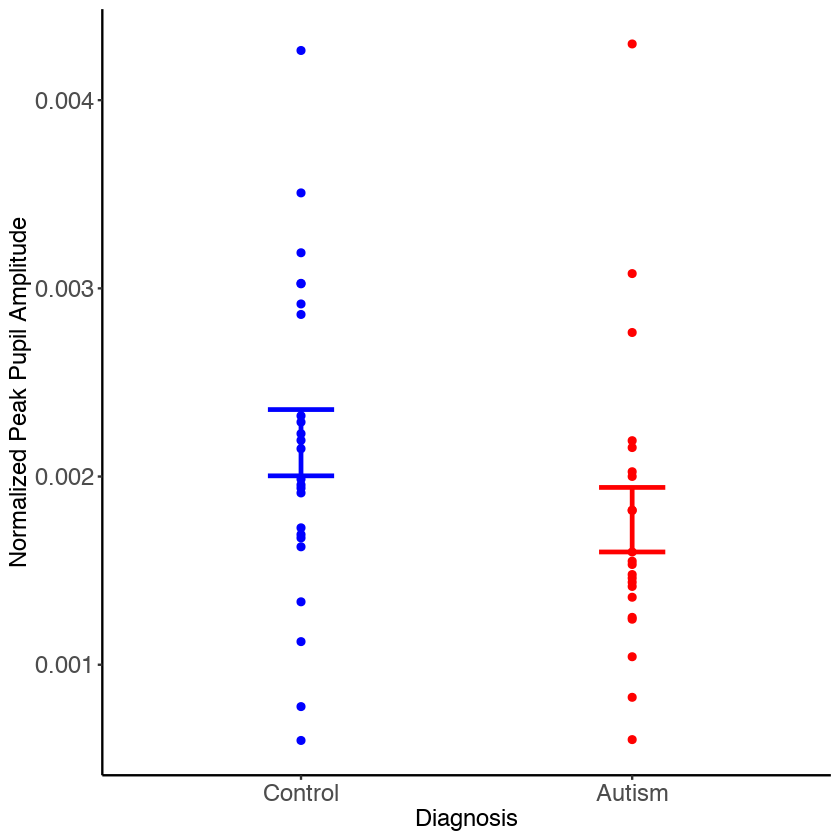

In [72]:
#plot data

ggplot(data = dataAud) +
geom_point(mapping = aes(x = diagnosis, y = peak)) +
aes(x = diagnosis, color = diagnosis, y = peak) + 
stat_summary(fun.data = mean_se, geom = "errorbar", width = 0.2, size = 1) + 
scale_x_discrete(breaks = c("1","0"), labels = c("Autism","Control")) +
scale_color_manual(breaks = c("1","0"), labels = c("Autism", "Control"), values=c("blue", "red")) +
#scale_y_continuous(limits = c(0.5,0.9)) +
ylab("Normalized Peak Pupil Amplitude") +
xlab("Diagnosis") +
theme_classic() +
theme(legend.position="none") +
theme(axis.text=element_text(size=14)) +
theme(axis.title=element_text(size=14))